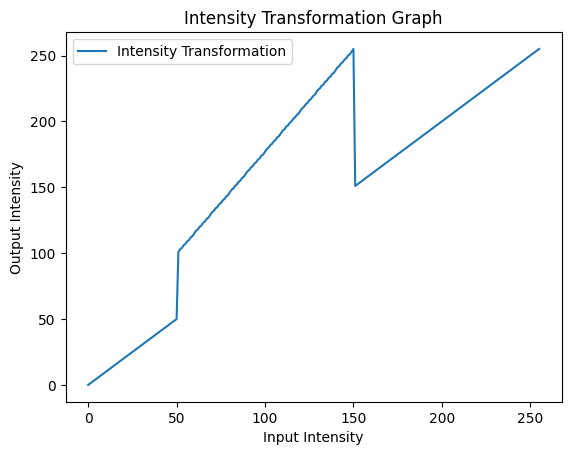

<Figure size 640x480 with 0 Axes>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity transformation functions for each segment
def segment1(x):
    return x

def segment2(x):
    return 1.55 * x + 22.5

def segment3(x):
    return x

# Create x values for plotting
x_values = np.arange(256)

# Calculate y values for each segment
y_values = np.piecewise(x_values, [x_values <= 50, (x_values > 50) & (x_values <= 150), x_values > 150], [segment1, segment2, segment3])

# Plot the intensity transformation graph
plt.plot(x_values, y_values, label='Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Transformation Graph')
plt.legend()
plt.show()

# Save the plot as an image
plt.savefig('intensity_transformation_graph_Q1.png')

# Read the input image
input_image = cv2.imread('../Assignment1_Images/emma.jpg', cv2.IMREAD_GRAYSCALE)  

# Apply the intensity transformation to the image
def apply_intensity_transform(image):
    transformed_image = np.zeros_like(image)

    # Apply the transformation for each pixel
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y, x] <= 50:
                transformed_image[y, x] = segment1(image[y, x])
            elif image[y, x] <= 150:
                transformed_image[y, x] = segment2(image[y, x])
            else:
                transformed_image[y, x] = segment3(image[y, x])
    
    return transformed_image

# Apply the intensity transformation to the input image
output_image = apply_intensity_transform(input_image)

# Save or display the output image
cv2.imwrite('Q1_output_image_emma.jpg', output_image)  # Save the output image
cv2.imshow('Output Image', output_image)  # Display the output image
cv2.waitKey(0)
cv2.destroyAllWindows()
